2023/01/06(FRI)ニューラルネットワーク（髙林メモ）

グループワーク：中内さん、久保田さん、小林さん（今日は色々教えて貰いました）

Keras（Pythonの深層学習フレームワーク)
TensorFlow(google)上で動作する：tensorflow2に含まれるkeras
Jupyter Notebookユーザー多い、断片的にプログラムを動かせる

tensorflowのインストール方法

https://qiita.com/exy81/items/48314b968d9fad6170c8

ライブラリ

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

演習1:OR回路をロジスティック
回帰で作ろう

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5684
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5360
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5088
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4869
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4689
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4537
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4407
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4294
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4192
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4102
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4021
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3945
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

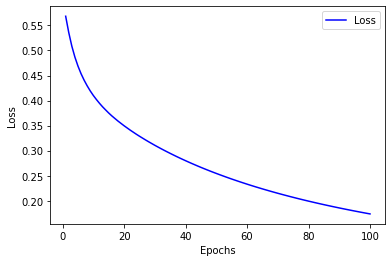

In [6]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=100, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [7]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.33805695]
 [0.8518578 ]
 [0.9040224 ]
 [0.99065894]]


• 結果はどうなりましたか？
• エポック数を変えるとどうなりますか？
• バッチサイズを変えるとどうなりますか？
• 学習率を変えるとどうなりますか？

結果はエポック数が増えるごとにloss関数の値が小さくなる（反比例している）。

ここでエポック数を200に変更してみる

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7620
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6850
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6268
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5840
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5507
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5249
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5043
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4874
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4733
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4613
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4507
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4410
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

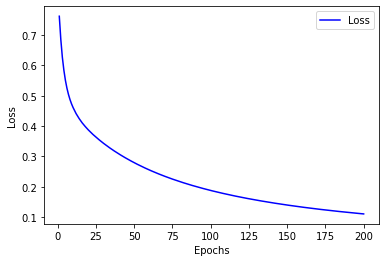

In [8]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=200, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.22476122]
 [0.91084516]
 [0.9171697 ]
 [0.9974437 ]]


【結果】エポック数を100から200に増やすと、Loss関数の値が小さくなる。また、出力された確率が上がっている。

またエポック数を100でバッジサイズを5にしてみる

Epoch 1/100
1/1 [==============================] - 0s 400ms/step - loss: 0.4498
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4449
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4403
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4359
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4317
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4277
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4239
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4203
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4168
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4134
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4103
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4072
Epoch 13/100
1/1 [==============================] - 0s 6ms

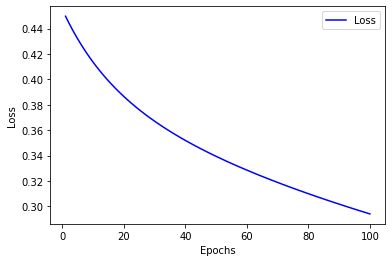

In [10]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=100, 
batch_size=5)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[False]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.5155221 ]
 [0.86576843]
 [0.773341  ]
 [0.9538767 ]]


【結果】バッジサイズを増やすと、Loss関数の値が小さくなる。しかし、出力された確率が下がった。

念の為、バッジサイズ50(エポック数100、学習率0.1)でも試してみる

モデル構築(Modeling)+学習(learning)

Epoch 1/100
1/1 [==============================] - 0s 327ms/step - loss: 1.1430
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 1.1014
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0622
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0254
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9907
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9582
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.9277
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8992
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8726
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8477
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8244
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8028
Epoch 13/100
1/1 [==============================] - 0s 7m

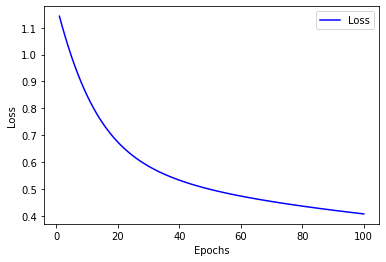

In [12]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=100, 
batch_size=50)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[False]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.65473497]
 [0.73228604]
 [0.86564547]
 [0.90285236]]


【結果】バッジサイズを50にするとLoss関数が小さくなっている気がする

学習率を0.1から0.8(エポック数:100、バッジサイズ1)にしてみる

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6787
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4864
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4305
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3894
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3571
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3220
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2996
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2729
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2542
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2384
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2214
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2091
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

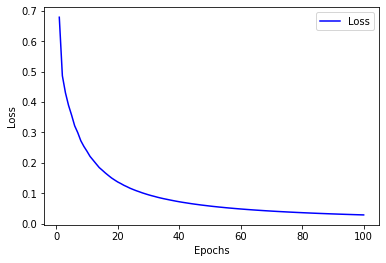

In [14]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.8))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=100, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 4ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.06149156]
 [0.9754471 ]
 [0.9753931 ]
 [0.9999584 ]]


【結果】Loss関数が少し大きくなってる感じがする（間違ってるかも...）

演習2:AND回路をロジスティッ
ク回帰で作ろう

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9940
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8660
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7214
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6663
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6107
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5266
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5007
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4159
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4154
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3925
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3584
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3430
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

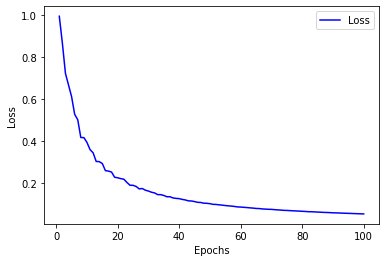

In [16]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.8))

#教師データ（training data）
X2=np.array([[0,0],[0,1],[1,0],[1,1]])
Y2=np.array([[0],[0],[0],[1]])

#学習(learning)
history=model.fit(X2,Y2,epochs=100, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [17]:
#予測（Prediction）
prob=model.predict(X2,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y2==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 4ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[2.8970087e-04]
 [5.7880819e-02]
 [5.8244329e-02]
 [9.2913824e-01]]


演習3:XOR回路をロジスティッ
ク回帰で作ろう

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9838
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0091
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0125
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9229
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0006
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9489
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9870
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9561
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8867
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9843
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9693
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9517
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

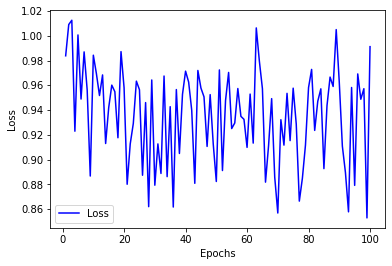

In [18]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.8))

#教師データ（training data）
X3=np.array([[0,0],[0,1],[1,0],[1,1]])
Y3=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X3,Y3,epochs=100, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [19]:
#予測（Prediction）
prob=model.predict(X3,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y3==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[False]
 [ True]
 [ True]
 [False]]

output probability:
[[0.58688664]
 [0.57082504]
 [0.5822823 ]
 [0.566174  ]]


演習4：XOR回路を3層ニューラルネットワークで作ろう

参考URL：SequentialモデルでKerasを始めてみよう

https://keras.io/ja/getting-started/sequential-model-guide/

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7205
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7186
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7167
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7165
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7156
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7150
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7137
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7134
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7129
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7126
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7133
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7133
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

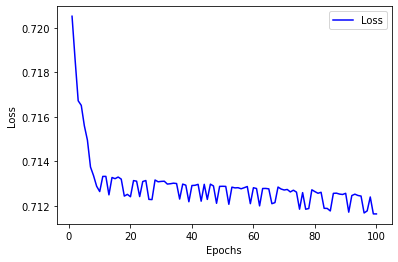

In [20]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する
#モデルのネットワーク構造の表示（showing network structure）
#model.summary()

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=100,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [21]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[ True]
 [False]
 [ True]
 [False]]

output probability:
[[0.47560447]
 [0.49480754]
 [0.5030286 ]
 [0.5201883 ]]


• エポック数が200のときはどうなりますか？
• エポック数を1000, 2000, 4000と増やしてみたらど
うなりますか？
• 学習率を変えるとどうなりますか？

エポック数を200の場合

モデル構築(Modeling)+学習(learning)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9123
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8565
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.8164
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7853
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7640
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7498
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7396
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7314
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7256
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.7211
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7183
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7157
Epoch 13/200
4/4 [==============================] - 0s 6ms/st

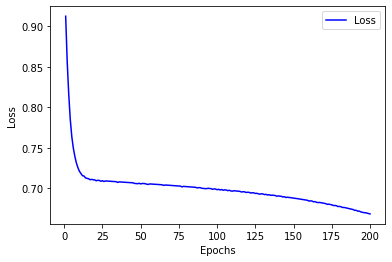

In [22]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=200,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [23]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[False]
 [False]
 [ True]
 [ True]]

output probability:
[[0.50358665]
 [0.49988037]
 [0.55001837]
 [0.4586211 ]]


エポック数を1000, 2000, 4000と増やす

まずエポック数を1000に増やす

モデル構築(Modeling)+学習(learning)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7275
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7269
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7263
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7260
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7244
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7240
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7251
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7233
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7246
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7243
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7243
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7240
Epoch 13/1000
4/4 [==============================

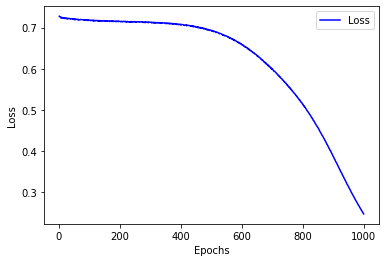

In [24]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=1000,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [25]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.15412325]
 [0.7973293 ]
 [0.7958026 ]
 [0.2779748 ]]


次にエポック数を2000に増やす

モデル構築(Modeling)+学習(learning)

Epoch 1/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.7221
Epoch 2/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7225
Epoch 3/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7222
Epoch 4/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.7211
Epoch 5/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.7220
Epoch 6/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7207
Epoch 7/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7217
Epoch 8/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7213
Epoch 9/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.7212
Epoch 10/2000
4/4 [==============================] - 0s 6ms/step - loss: 0.7210
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7210
Epoch 12/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.7209
Epoch 13/2000
4/4 [==============================

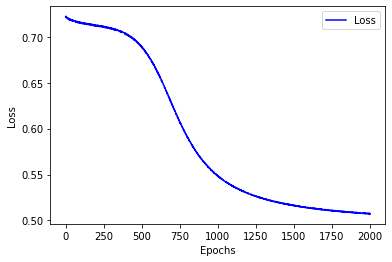

In [26]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=2000,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [27]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[ True]
 [ True]
 [ True]
 [False]]

output probability:
[[0.02024585]
 [0.6560559 ]
 [0.6559714 ]
 [0.66597104]]


最後にエポック数を4000に増やす

モデル構築(Modeling)+学習(learning)

ストリーミング出力は最後の 5000 行に切り捨てられました。
4/4 [==============================] - 0s 3ms/step - loss: 0.3725
Epoch 1502/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.3725
Epoch 1503/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.3725
Epoch 1504/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.3724
Epoch 1505/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.3724
Epoch 1506/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.3724
Epoch 1507/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.3724
Epoch 1508/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.3723
Epoch 1509/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.3723
Epoch 1510/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.3723
Epoch 1511/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.3723
Epoch 1512/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.3723


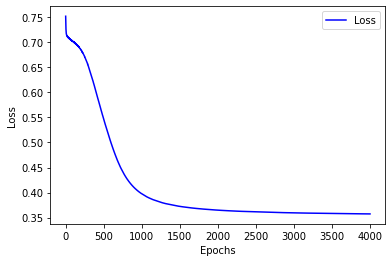

In [28]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=4000,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

学習率を0.8にしてみる(エポック数:100、バッチサイズ:1、学習率:0.8)

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8701
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8653
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8131
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8369
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8560
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8431
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8405
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8344
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8308
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8301
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8273
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8222
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

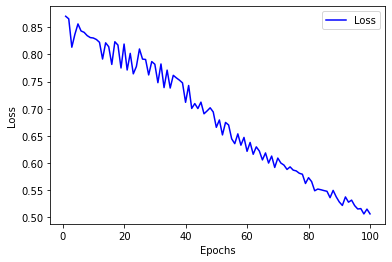

In [29]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.8))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=100,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [30]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[ True]
 [ True]
 [ True]
 [False]]

output probability:
[[0.06539182]
 [0.5611432 ]
 [0.82010895]
 [0.59612644]]
